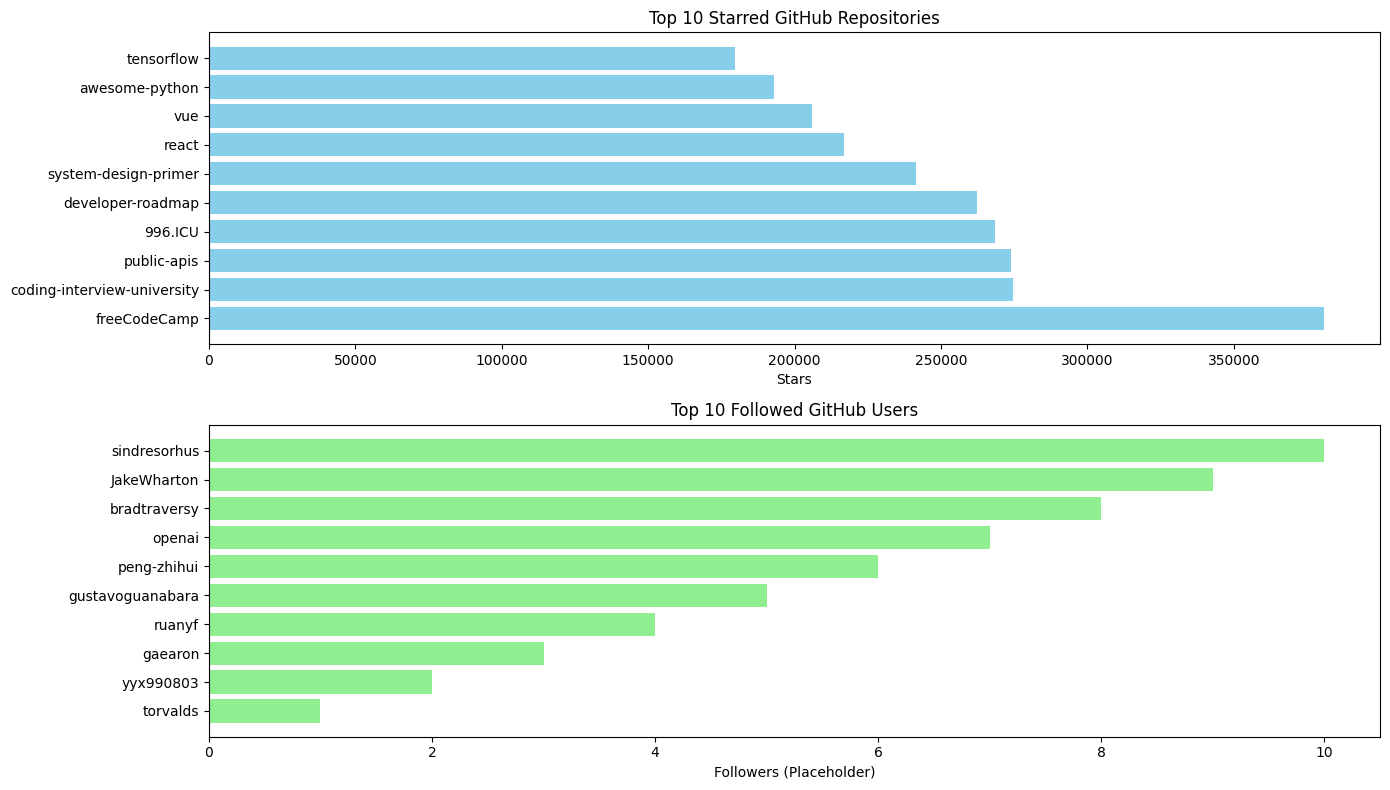

In [1]:
import requests
import json
import matplotlib.pyplot as plt
import logging

# Setting up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()

try:
    from google.colab import userdata
    token = userdata.get('ghtoken')
    if not token:
        raise ValueError("GitHub token is missing. Please provide a valid token.")

    # Setting up GitHub API interaction
    url = "https://api.github.com/user"
    headers = {"Authorization": "Bearer " + token}

    # Fetching user data
    r = requests.get(url, headers=headers)
    if r.status_code != 200:
        raise ConnectionError(f"Failed to fetch user data: {r.status_code} - {r.text}")

    r_json = json.loads(r.text)
    logger.info("User data fetched successfully.")
    logger.debug(r_json)  # Debug message with user data

    # Fetch top 10 starred repos
    repos_response = requests.get('https://api.github.com/search/repositories?q=stars:>1&sort=stars', headers=headers)
    if repos_response.status_code != 200:
        raise ConnectionError(f"Failed to fetch repositories: {repos_response.status_code} - {repos_response.text}")
    starred_repos = repos_response.json()['items'][:10]

    # Fetch top 10 users
    users_response = requests.get('https://api.github.com/search/users?q=followers:>1&sort=followers', headers=headers)
    if users_response.status_code != 200:
        raise ConnectionError(f"Failed to fetch users: {users_response.status_code} - {users_response.text}")
    users = users_response.json()['items'][:10]

    # Extracting data for visualization
    repo_names = [repo['name'] for repo in starred_repos]
    repo_stars = [repo['stargazers_count'] for repo in starred_repos]

    user_logins = [user['login'] for user in users]
    user_followers = [user['followers_url'] for user in users]  # Placeholder for actual follower count

    # Visualization with Matplotlib
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 1, 1)
    plt.barh(repo_names, repo_stars, color='skyblue')
    plt.xlabel('Stars')
    plt.title('Top 10 Starred GitHub Repositories')
    plt.tight_layout()

    plt.subplot(2, 1, 2)
    plt.barh(user_logins, range(1, 11), color='lightgreen')  # Placeholder for followers
    plt.xlabel('Followers (Placeholder)')
    plt.title('Top 10 Followed GitHub Users')
    plt.tight_layout()

    plt.show()

except ValueError as ve:
    logger.error(f"Input validation error: {ve}")
except ConnectionError as ce:
    logger.warning(f"Network related error occurred: {ce}")
except Exception as e:
    logger.error(f"An unexpected error occurred: {e}")
